In [1]:
import dataframeinfo as info
import dataframetransform as cleandata
import pandas as pd
import plotter as plots

# Load and transform data

In [2]:
# Load data and assign to variable.
loans = cleandata.loans
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54173 entries, 0 to 54227
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype        
---  ------                      --------------  -----        
 0   id                          54173 non-null  int64        
 1   member_id                   54173 non-null  int64        
 2   loan_amount                 54173 non-null  int64        
 3   funded_amount               54173 non-null  float64      
 4   funded_amount_inv           54173 non-null  float64      
 5   term_months                 54173 non-null  float64      
 6   int_rate                    54173 non-null  float64      
 7   instalment                  54173 non-null  float64      
 8   grade                       54173 non-null  category     
 9   sub_grade                   54173 non-null  category     
 10  employment_min_years        54173 non-null  float64      
 11  home_ownership              54173 non-null  category     
 12  annual_in

## Data transformations
### 1. Reduce skew

In [3]:
# Create instance of the DataFrameInfo class
loans_info = info.DataFrameInfo(loans)
loans_info.shape()

The shape of the dataframe or array is: (54173, 40)


In [4]:
# Assign columns to transform to variables and check lists.
columns_box = cleandata.cols_to_transform_box
columns_log = cleandata.cols_to_transform_log
print(len(columns_box), columns_box)
print(len(columns_log), columns_log)

11 ['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']
2 ['annual_inc', 'inq_last_6mths']


In [5]:
# List all columns to be transformed.
modified_cols = columns_box + columns_log
print(len(modified_cols), modified_cols)

13 ['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount', 'annual_inc', 'inq_last_6mths']


In [6]:
# Check columns before transformation.
loans[modified_cols].head(4)

,loan_amount,funded_amount,funded_amount_inv,instalment,open_accounts,total_accounts,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,last_payment_amount,annual_inc,inq_last_6mths
0,8000,8000.0,8000.0,248.82,12,27,2982.51,2982.51,2470.30,512.21,248.82,46000.0,1
1,13200,13200.0,13200.0,407.52,15,31,4885.11,4885.11,4097.17,787.94,407.52,50000.0,0
2,16000,16000.0,16000.0,497.63,7,18,16824.54,16824.54,16000.00,824.54,12850.16,73913.0,0
3,15000,15000.0,15000.0,514.93,6,13,15947.47,15947.47,15000.00,947.47,13899.67,42000.0,0


In [7]:
# Transform data.
cleandata.transform_original(loans, columns_box, columns_log)

In [8]:
# Check columns after transformation.
loans[modified_cols].head(4)

,loan_amount,funded_amount,funded_amount_inv,instalment,open_accounts,total_accounts,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,last_payment_amount,annual_inc,inq_last_6mths
0,68.070671,66.744573,118.539549,16.255871,3.695258,7.016266,37.015481,52.607515,37.869360,12.052249,5.182531,10.736397,0.0
1,82.089586,80.380914,148.523308,19.762689,4.182550,7.569847,43.848540,64.017841,45.409252,13.537679,5.612876,10.819778,0.0
2,88.184663,86.303623,161.928696,21.358690,2.644716,5.562346,66.532576,104.080724,73.376926,13.701596,8.496794,11.210644,0.0
3,86.092537,84.271045,157.303476,21.642745,2.374276,4.559138,65.354433,101.928038,71.744504,14.212325,8.559799,10.645425,0.0


In [9]:
# SHOULD POSSIBLY RENAME COLUMNS TO INDICATE TRANSFORMATION TYPE.

### 2. Remove outliers

In [10]:
# Plot initital data.
# Create instance of PlotStats class
loans_plot_stats = plots.PlotStats(loans)

def true_num_cols(loans):
    all_cols = loans.columns
    non_cat_types = ["int64", "float64", "datetime64[s]"]
    non_cat_cols = [col for col in all_cols if loans[col].dtypes in non_cat_types]
    cols_to_exclude = ["id", "member_id", "policy_code", "application_type", "term_months"]
    true_num_cols = [item for item in non_cat_cols if item not in cols_to_exclude]
    return true_num_cols

cols_to_plot = true_num_cols(loans)
print(len(cols_to_plot), cols_to_plot)

28 ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'employment_min_years', 'annual_inc', 'issue_date', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med']


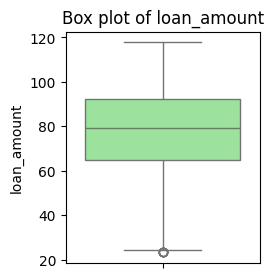

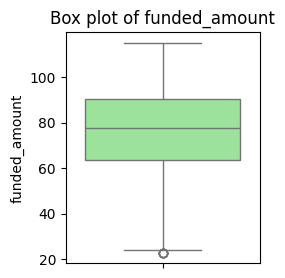

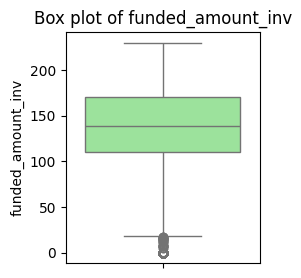

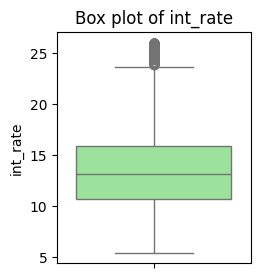

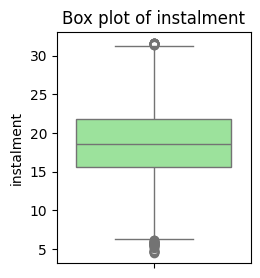

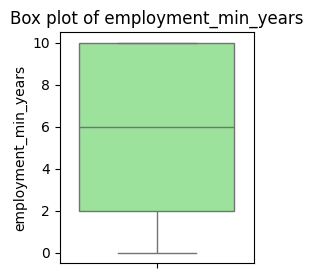

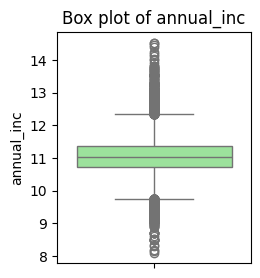

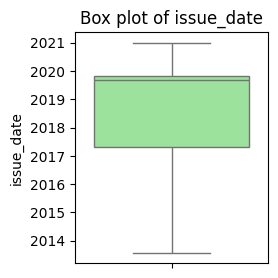

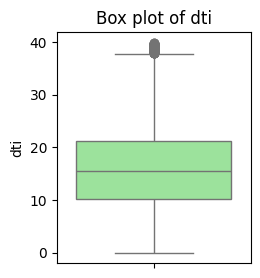

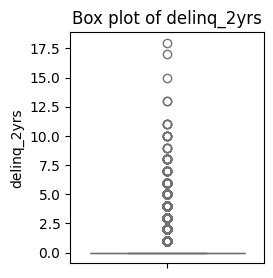

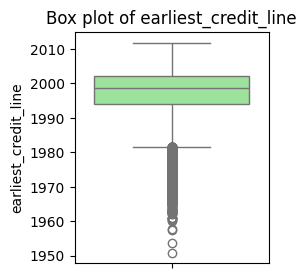

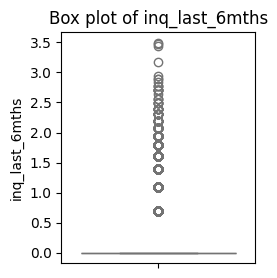

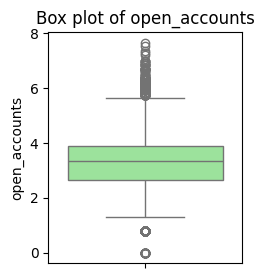

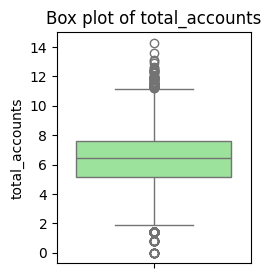

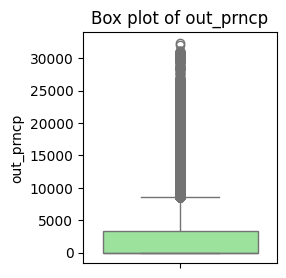

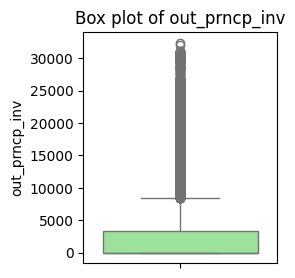

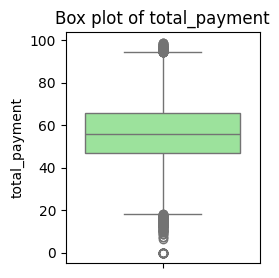

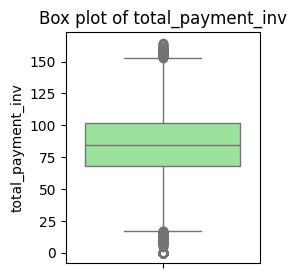

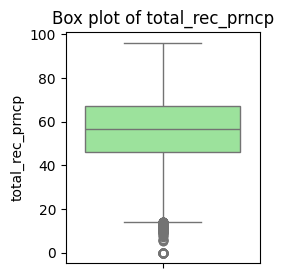

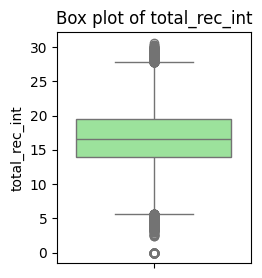

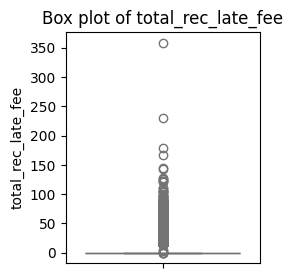

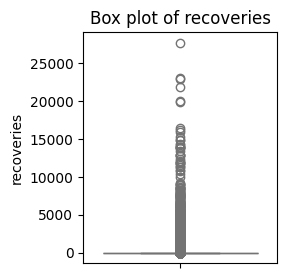

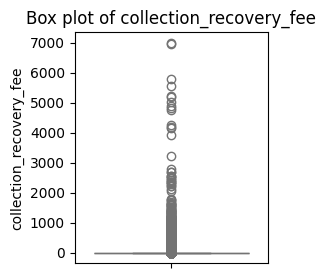

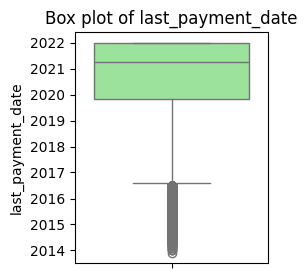

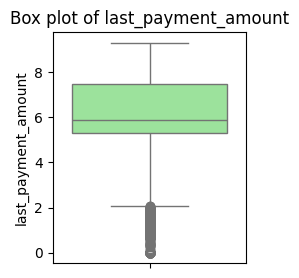

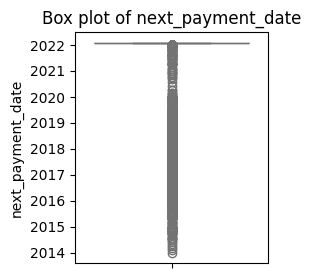

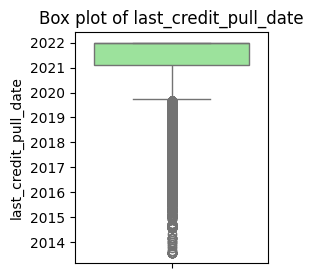

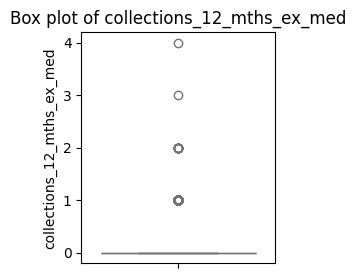

In [11]:
for col in cols_to_plot:
    loans_plot_stats.box_plot(col)

#### Outlier removal

loan_amount: skew = -0.043
loan_amount: K^2 test statistic = 1120.702, p = 0.000


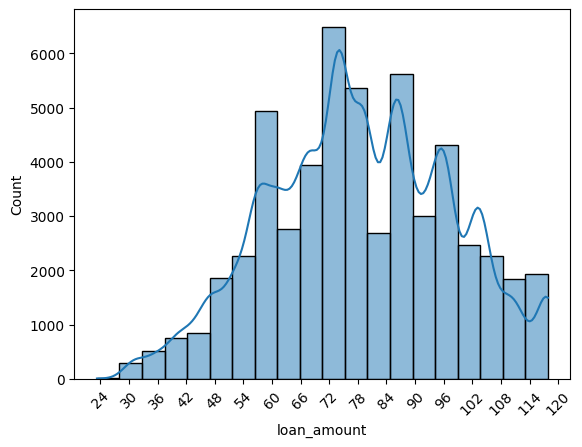

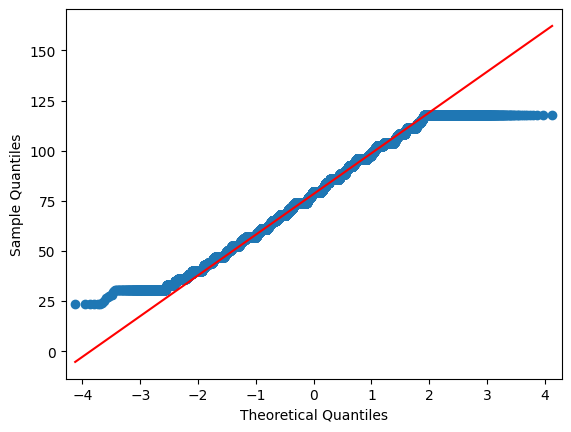

funded_amount: skew = -0.041
funded_amount: K^2 test statistic = 1020.528, p = 0.000


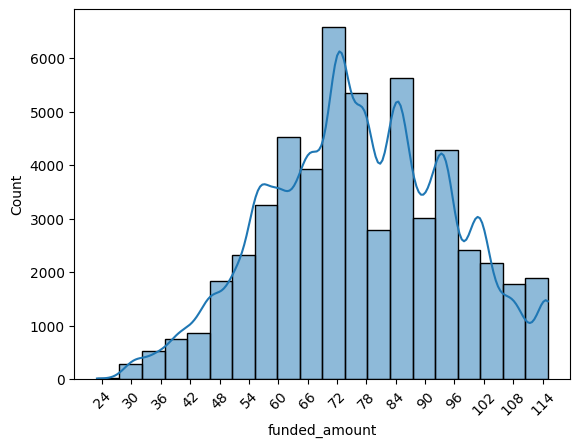

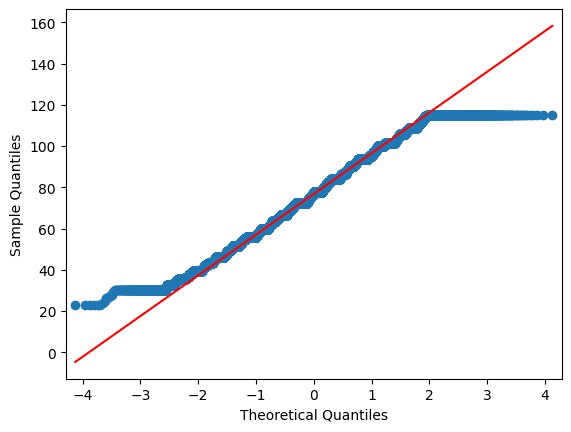

funded_amount_inv: skew = -0.035
funded_amount_inv: K^2 test statistic = 287.636, p = 0.000


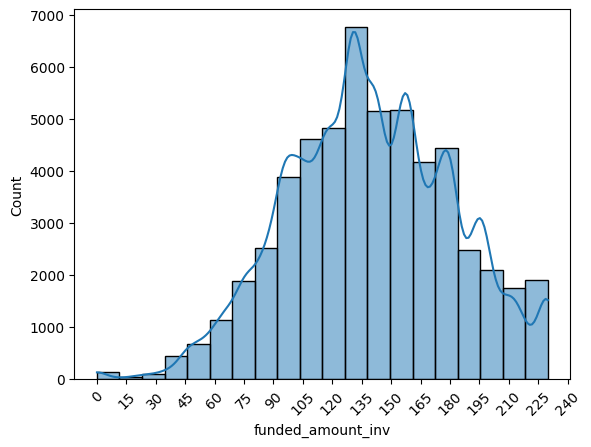

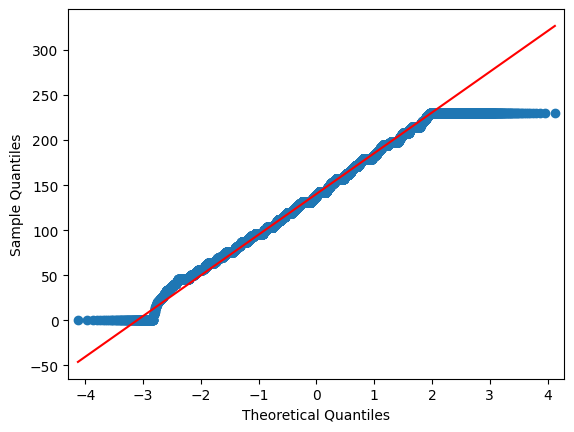

int_rate: skew = 0.456
int_rate: K^2 test statistic = 1720.483, p = 0.000


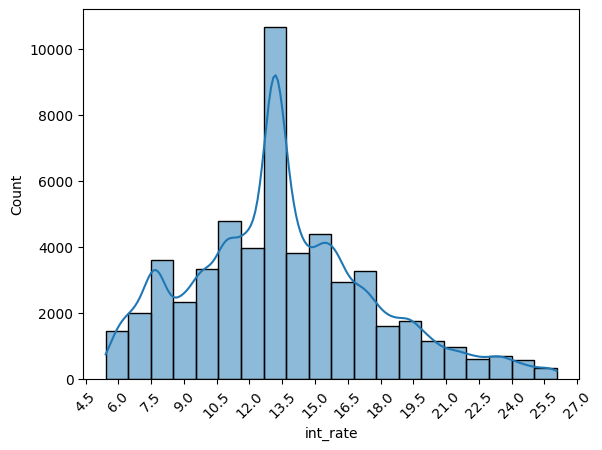

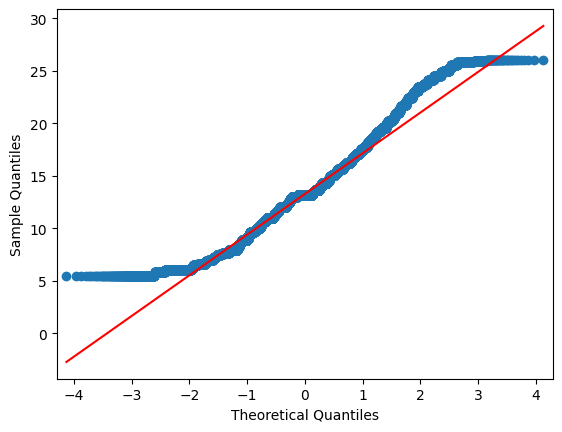

instalment: skew = -0.021
instalment: K^2 test statistic = 203.326, p = 0.000


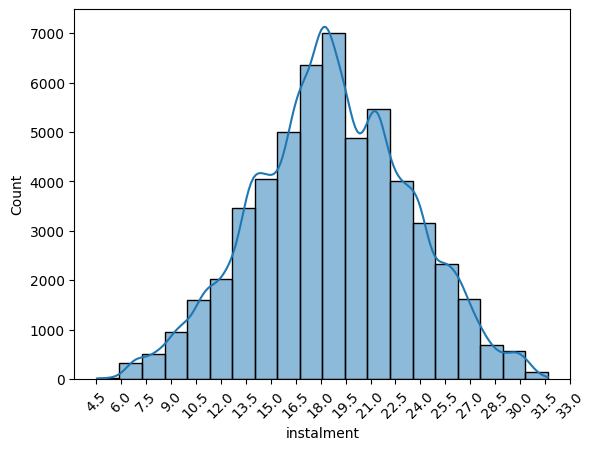

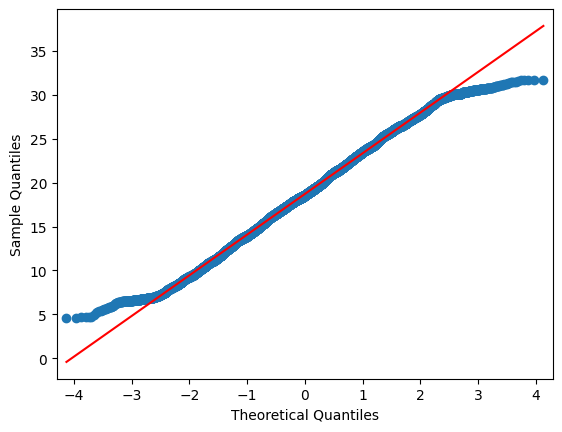

employment_min_years: skew = -0.184
employment_min_years: K^2 test statistic = 347060.910, p = 0.000


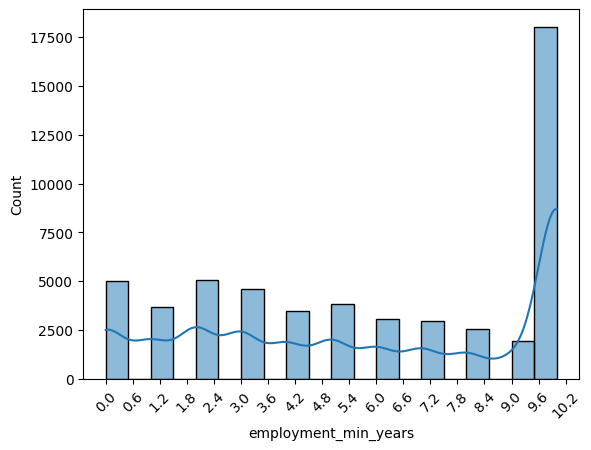

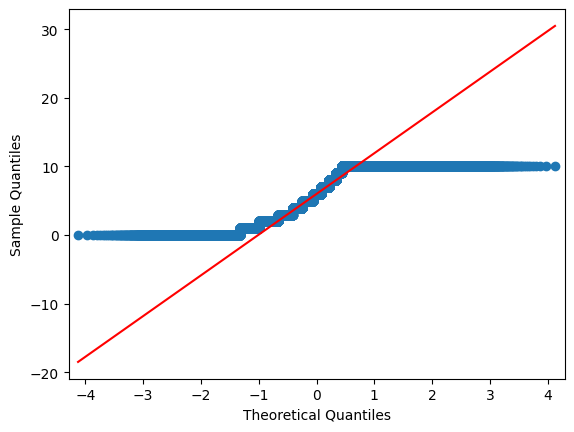

annual_inc: skew = 0.14
annual_inc: K^2 test statistic = 1521.121, p = 0.000


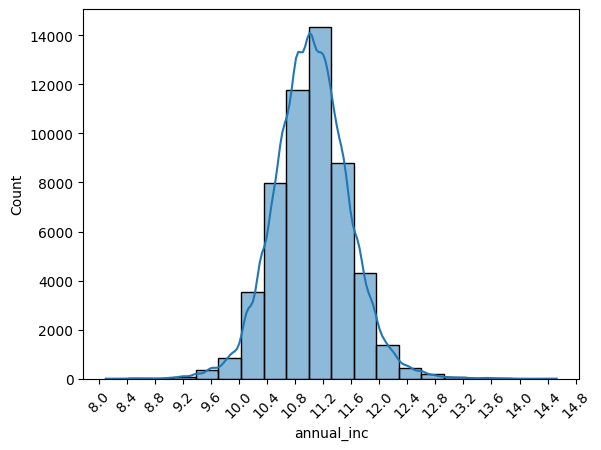

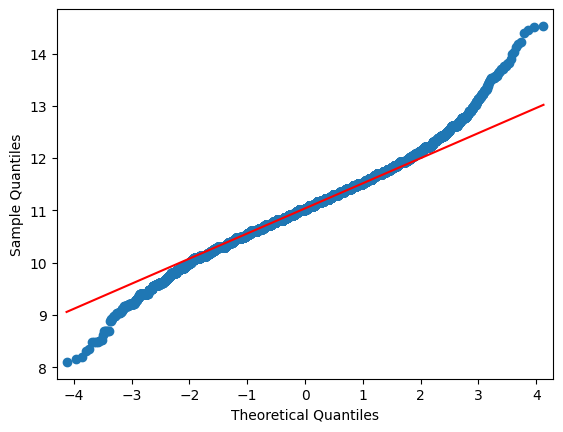

dti: skew = 0.189
dti: K^2 test statistic = 1236.329, p = 0.000


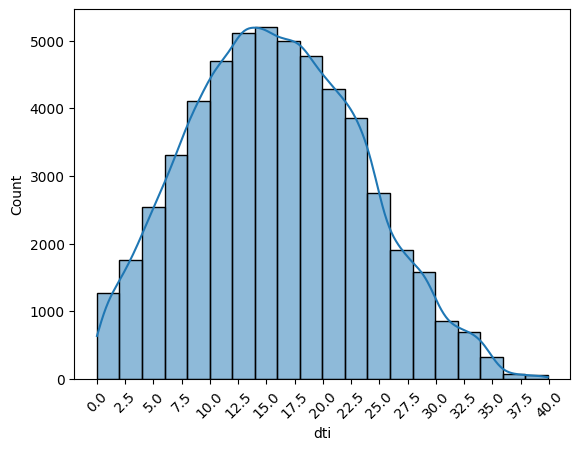

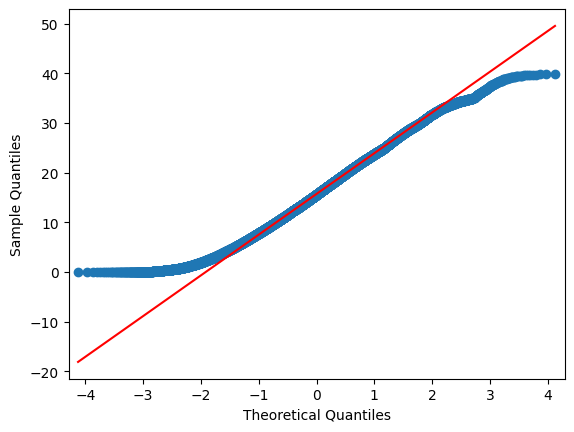

delinq_2yrs: skew = 5.312
delinq_2yrs: K^2 test statistic = 57879.466, p = 0.000


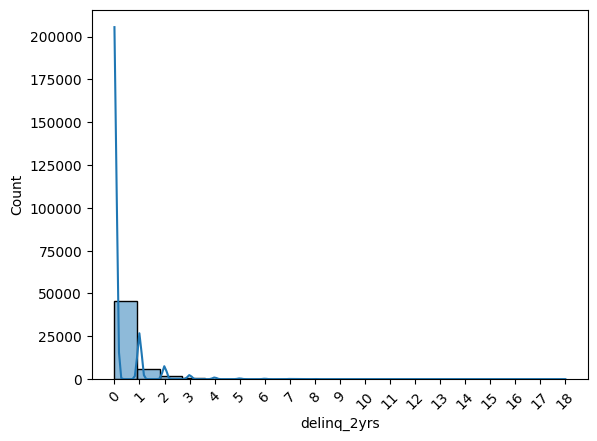

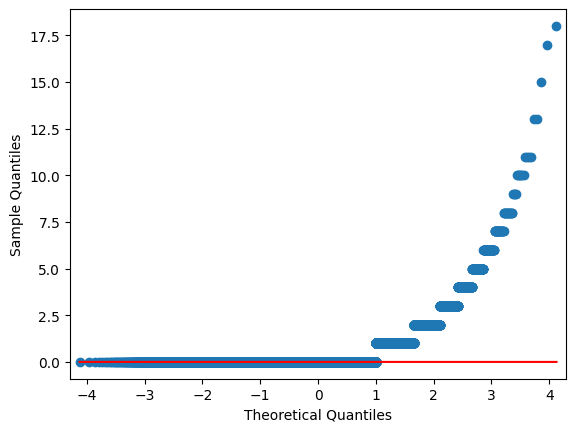

inq_last_6mths: skew = 1.969
inq_last_6mths: K^2 test statistic = 19884.866, p = 0.000


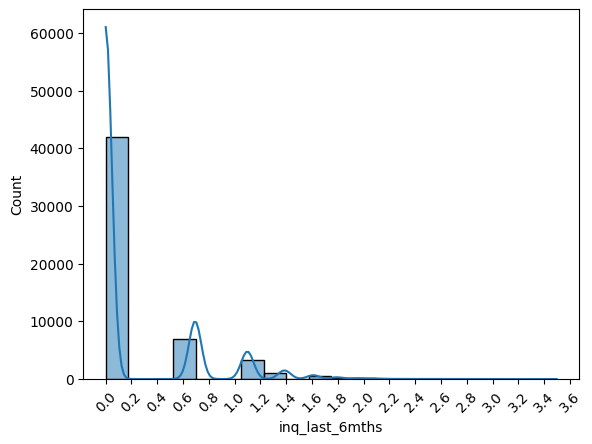

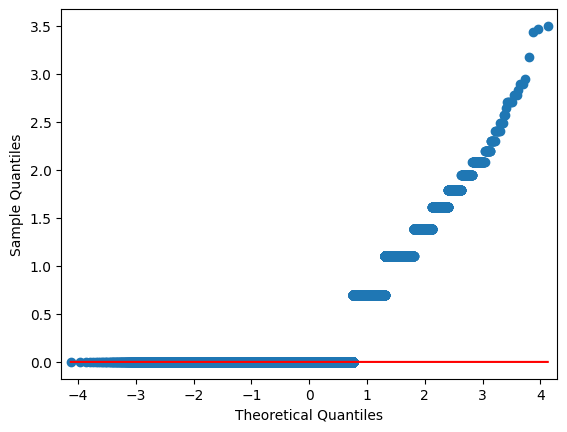

open_accounts: skew = 0.006
open_accounts: K^2 test statistic = 42.519, p = 0.000


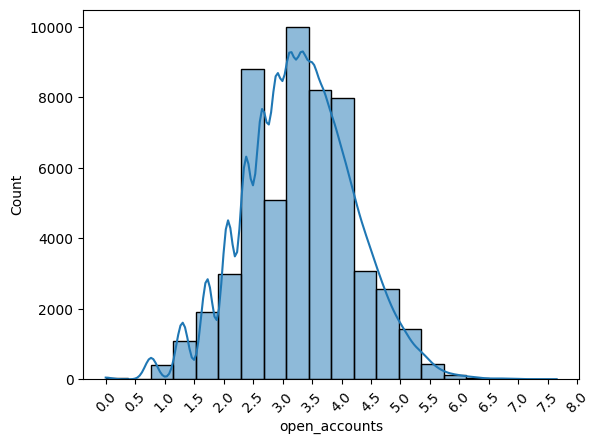

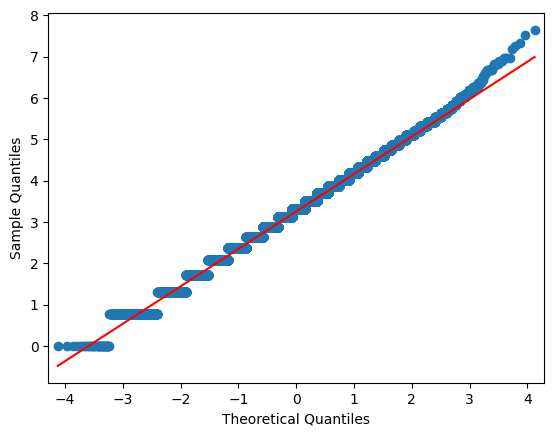

total_accounts: skew = -0.013
total_accounts: K^2 test statistic = 65.419, p = 0.000


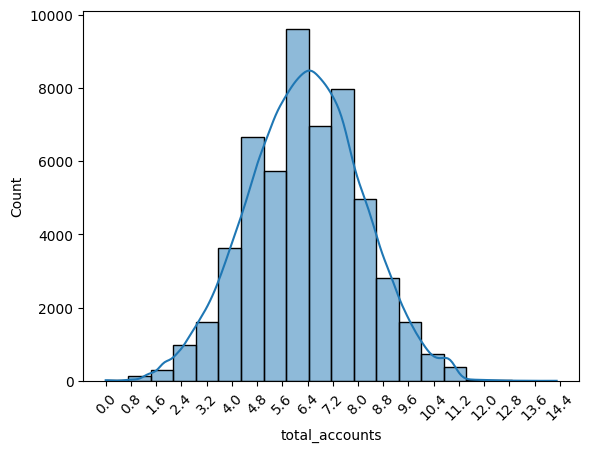

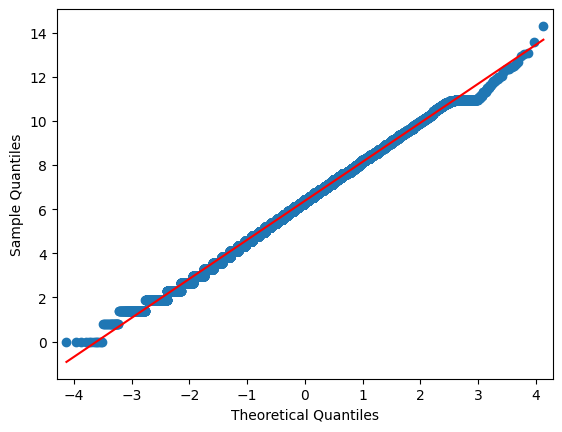

out_prncp: skew = 2.355
out_prncp: K^2 test statistic = 25581.289, p = 0.000


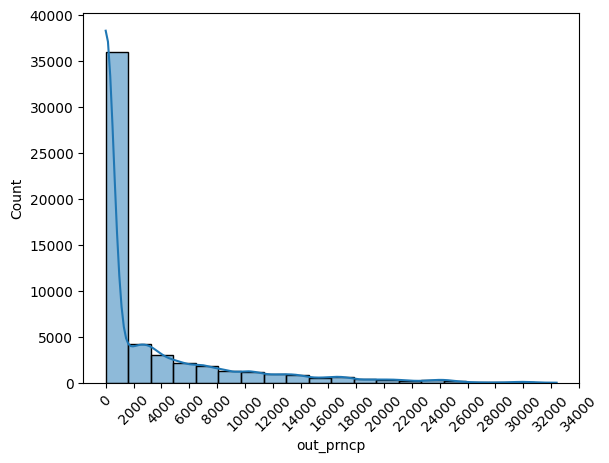

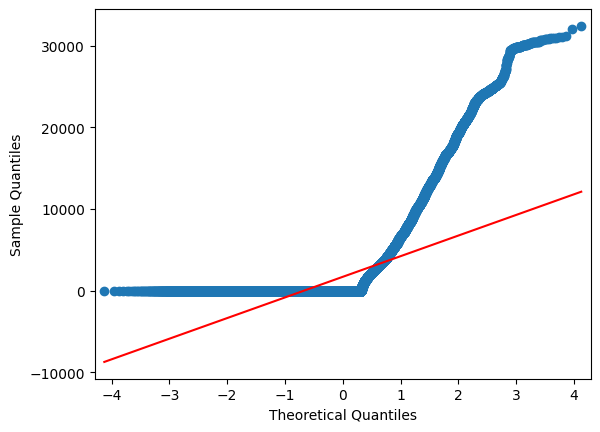

out_prncp_inv: skew = 2.355
out_prncp_inv: K^2 test statistic = 25586.577, p = 0.000


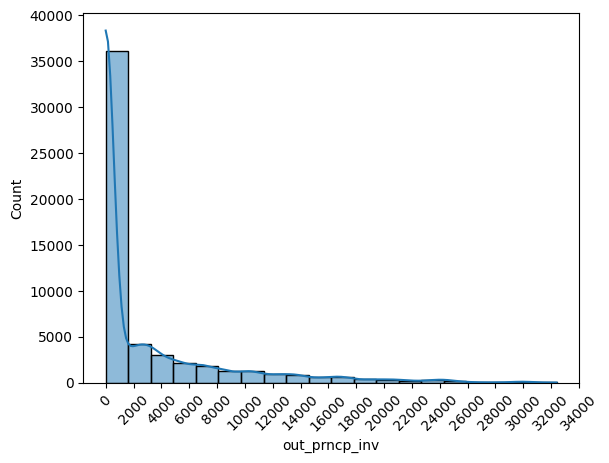

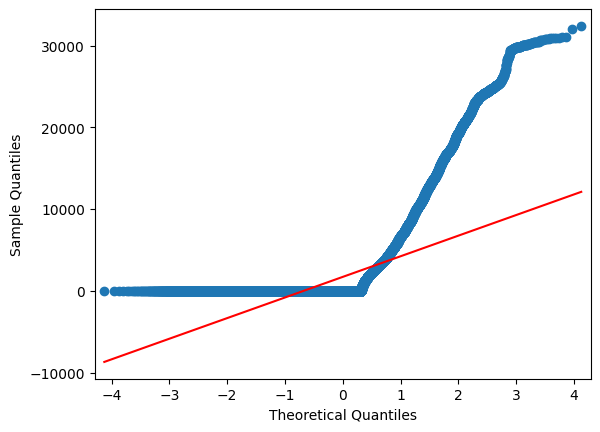

total_payment: skew = -0.004
total_payment: K^2 test statistic = 29.651, p = 0.000


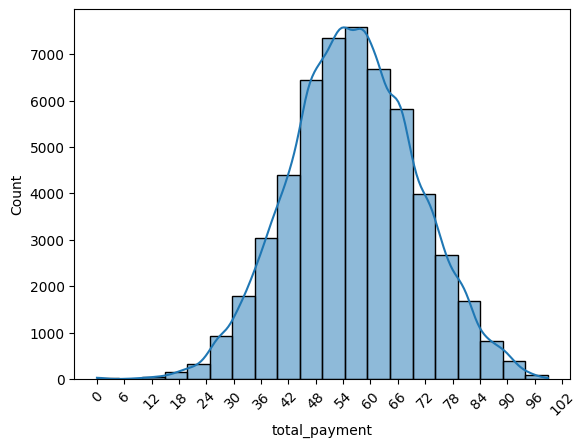

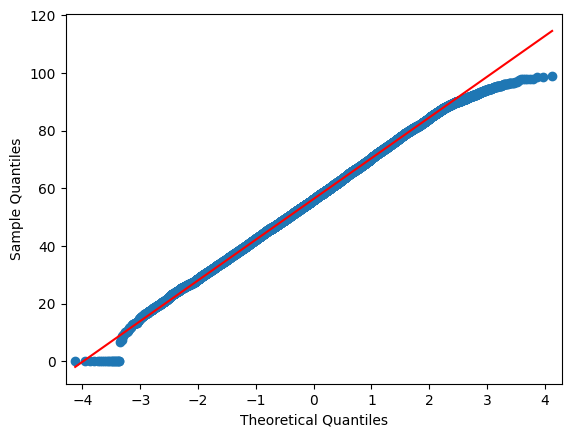

total_payment_inv: skew = 0.006
total_payment_inv: K^2 test statistic = 2.682, p = 0.262


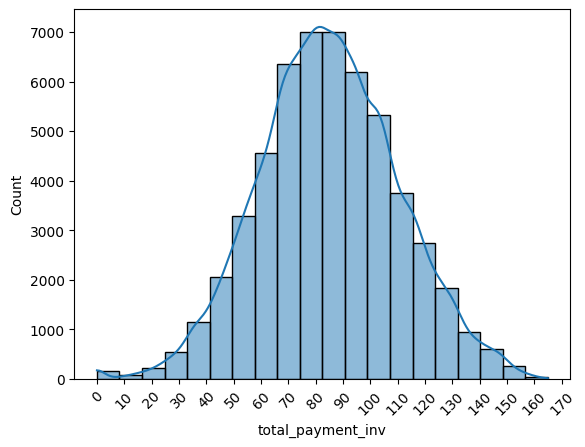

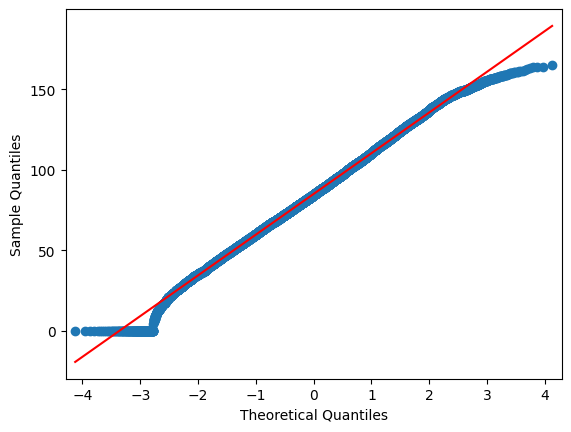

total_rec_prncp: skew = -0.004
total_rec_prncp: K^2 test statistic = 37.865, p = 0.000


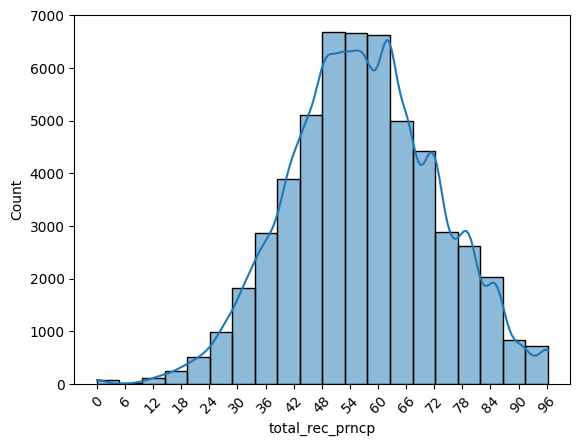

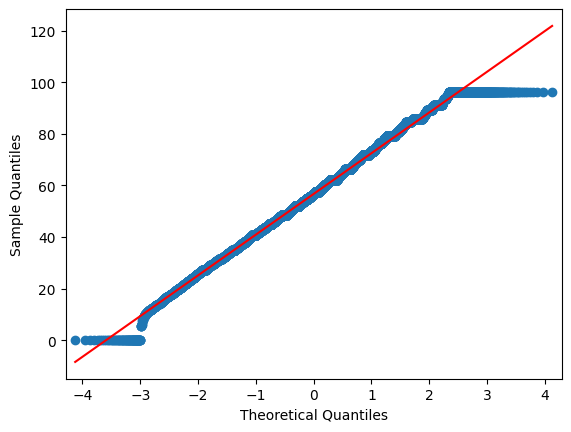

total_rec_int: skew = 0.021
total_rec_int: K^2 test statistic = 62.945, p = 0.000


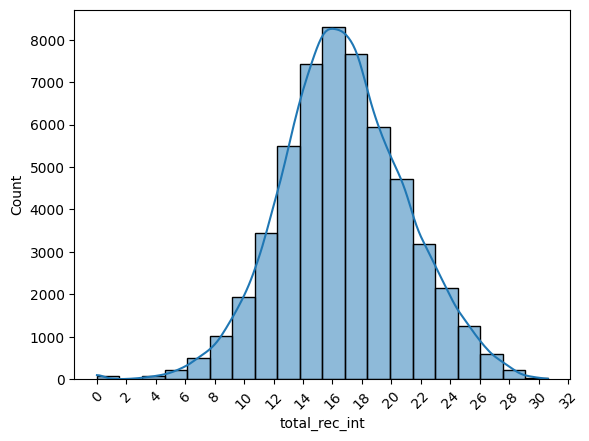

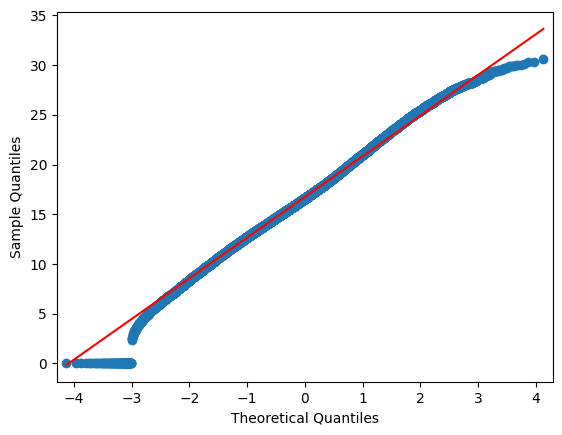

total_rec_late_fee: skew = 13.267
total_rec_late_fee: K^2 test statistic = 98849.802, p = 0.000


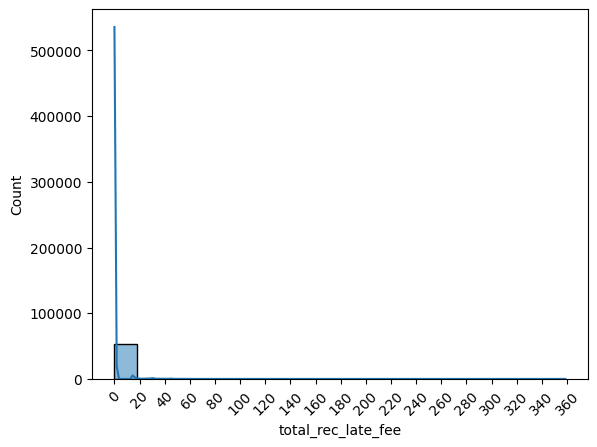

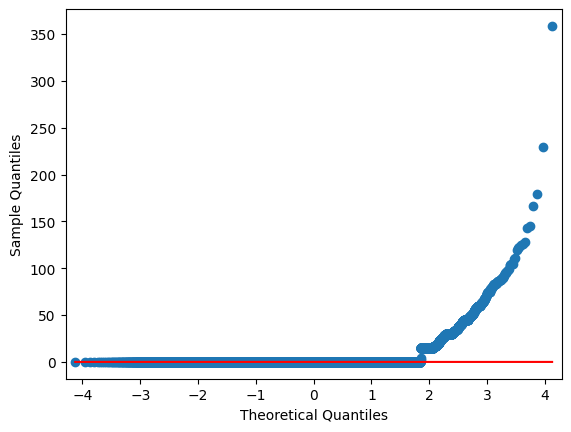

recoveries: skew = 14.595
recoveries: K^2 test statistic = 102757.220, p = 0.000


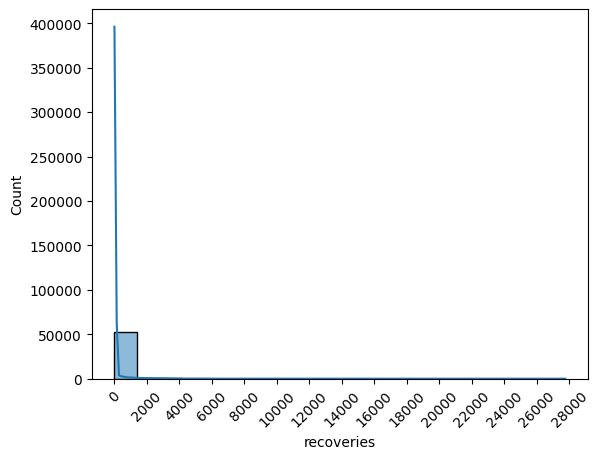

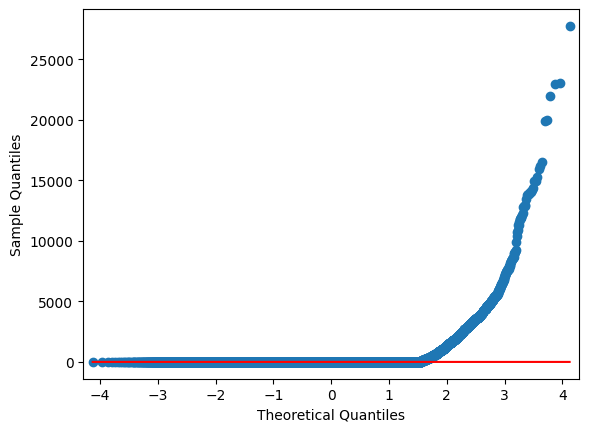

collection_recovery_fee: skew = 27.649
collection_recovery_fee: K^2 test statistic = 135938.714, p = 0.000


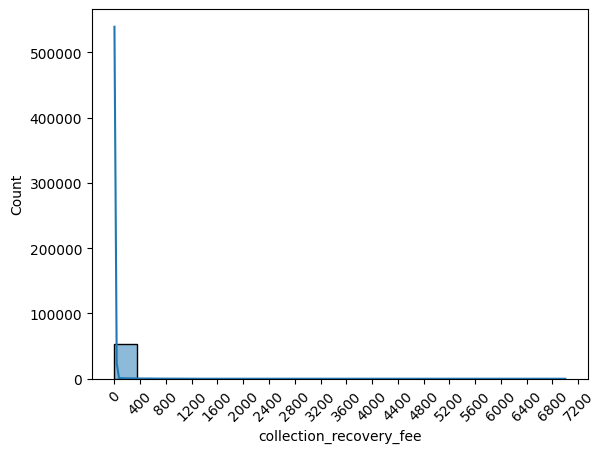

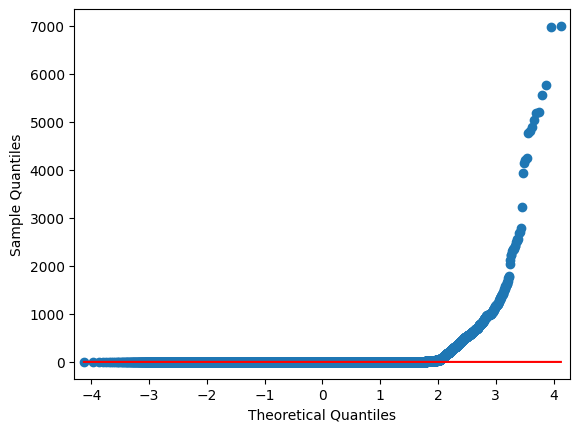

last_payment_amount: skew = -0.002
last_payment_amount: K^2 test statistic = 82.761, p = 0.000


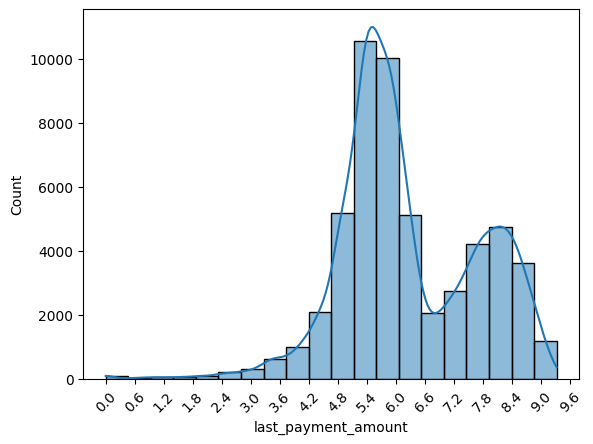

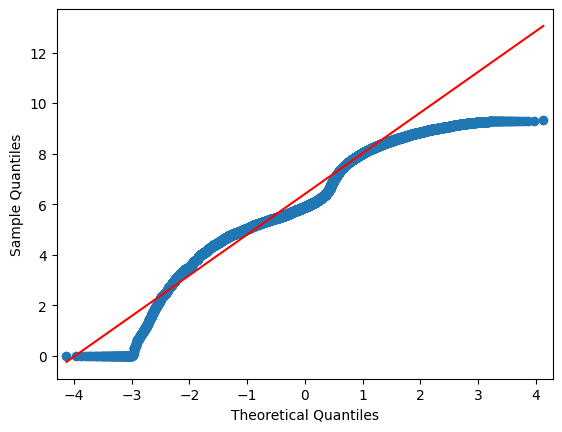

collections_12_mths_ex_med: skew = 20.251
collections_12_mths_ex_med: K^2 test statistic = 118875.877, p = 0.000


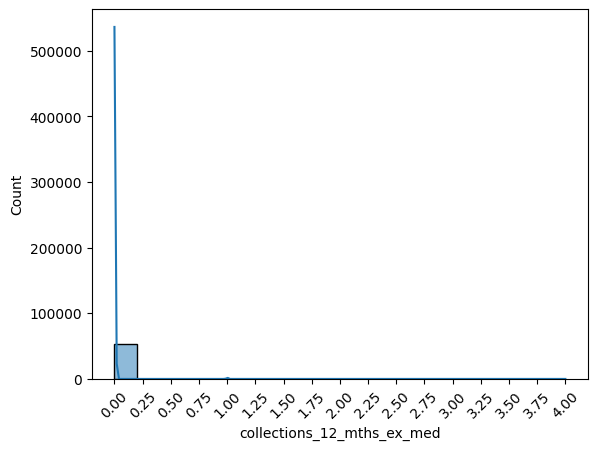

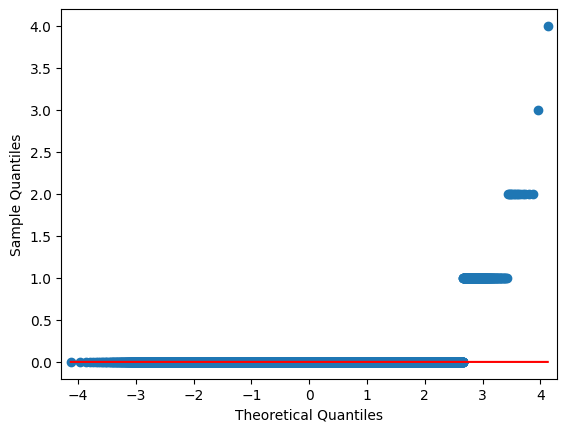

{'loan_amount': 1120.7, 'funded_amount': 1020.53, 'funded_amount_inv': 287.64, 'int_rate': 1720.48, 'instalment': 203.33, 'employment_min_years': 347060.91, 'annual_inc': 1521.12, 'dti': 1236.33, 'delinq_2yrs': 57879.47, 'inq_last_6mths': 19884.87, 'open_accounts': 42.52, 'total_accounts': 65.42, 'out_prncp': 25581.29, 'out_prncp_inv': 25586.58, 'total_payment': 29.65, 'total_payment_inv': 2.68, 'total_rec_prncp': 37.87, 'total_rec_int': 62.95, 'total_rec_late_fee': 98849.8, 'recoveries': 102757.22, 'collection_recovery_fee': 135938.71, 'last_payment_amount': 82.76, 'collections_12_mths_ex_med': 118875.88}
['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']
14
loan_amount: {'Q1': 64.741, 'Q3': 92.131, 'IQR': 27.39, 'lower_whisker': 23.656, 'upper_whisker': 133.216}
funded_amount: {'Q1': 63.502, 'Q3': 90.136,

In [12]:
# Remove outliers
loans = cleandata.remove_outliers_original(loans)

### Plot modified data

In [13]:
# Check modified data
loans_modified_plot_stats = plots.PlotStats(loans)
loans_modified_info = info.DataFrameInfo(loans)

In [14]:
loans_modified_info.shape()

The shape of the dataframe or array is: (50418, 40)


In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50418 entries, 0 to 54221
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype        
---  ------                      --------------  -----        
 0   id                          50418 non-null  int64        
 1   member_id                   50418 non-null  int64        
 2   loan_amount                 50418 non-null  float64      
 3   funded_amount               50418 non-null  float64      
 4   funded_amount_inv           50418 non-null  float64      
 5   term_months                 50418 non-null  float64      
 6   int_rate                    50418 non-null  float64      
 7   instalment                  50418 non-null  float64      
 8   grade                       50418 non-null  category     
 9   sub_grade                   50418 non-null  category     
 10  employment_min_years        50418 non-null  float64      
 11  home_ownership              50418 non-null  category     
 12  annual_in

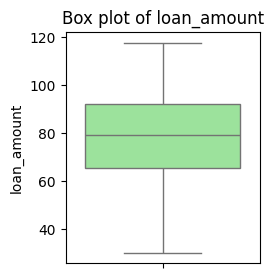

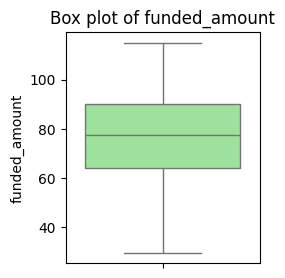

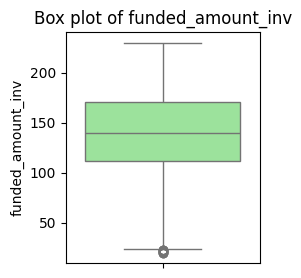

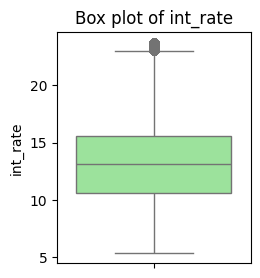

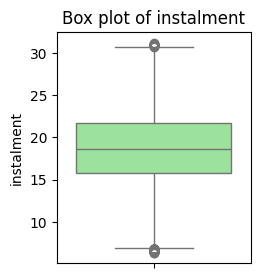

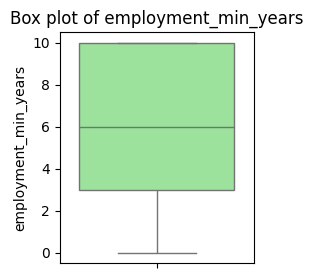

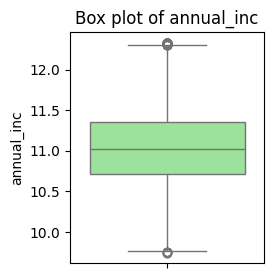

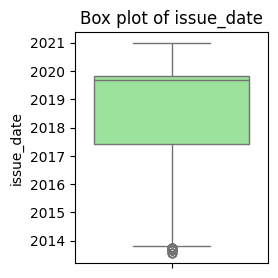

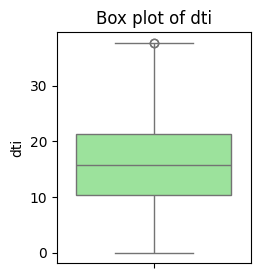

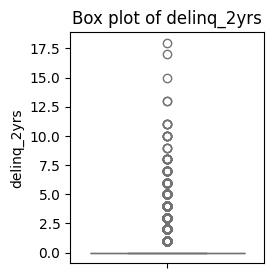

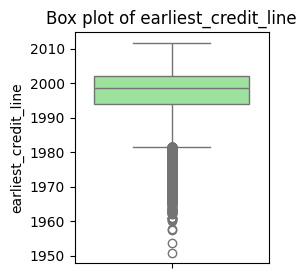

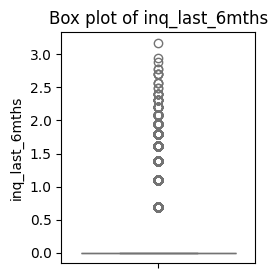

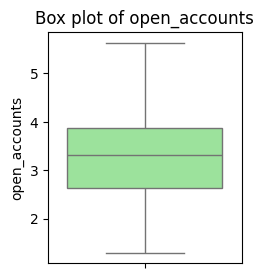

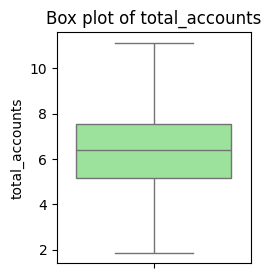

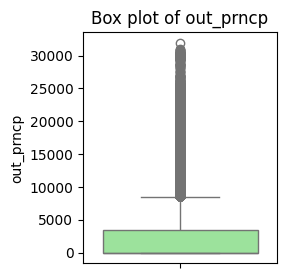

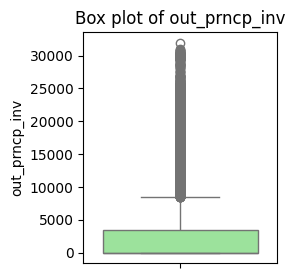

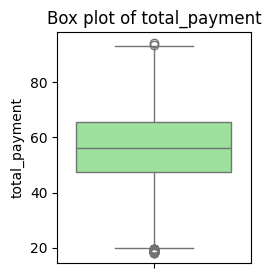

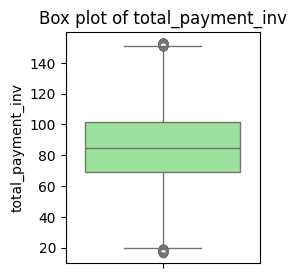

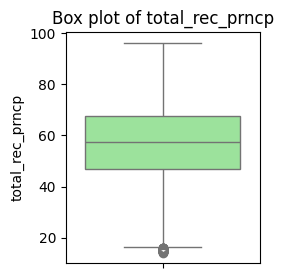

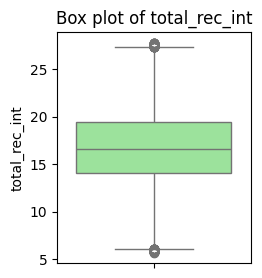

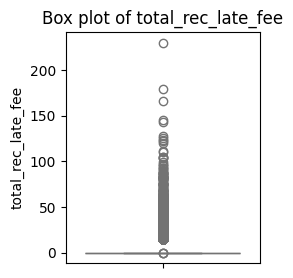

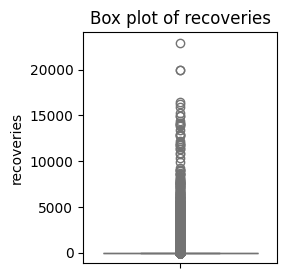

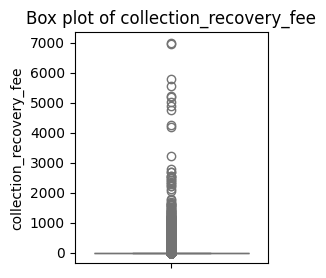

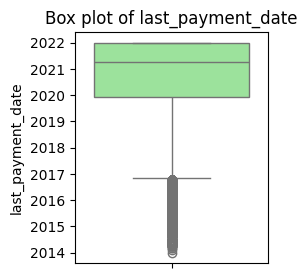

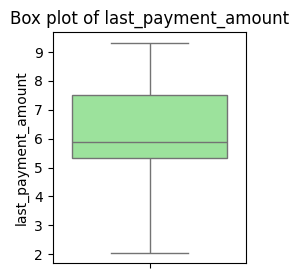

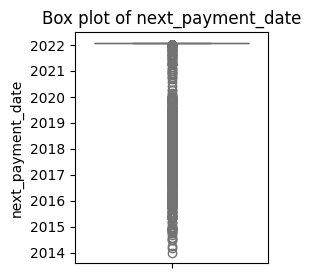

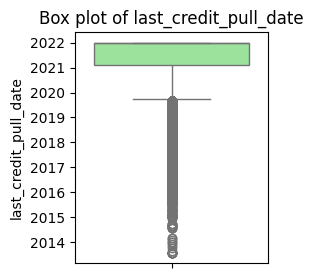

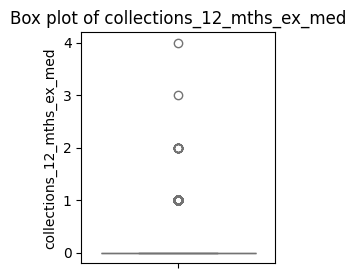

In [16]:
for col in cols_to_plot: 
    loans_modified_plot_stats.box_plot(col)

In [17]:
# To add quantiles table using quantiles dict. 

### Drop collinear columns

In [18]:
# Run function to drop collinear columns. 
loans = cleandata.drop_collinear(loans)

In [19]:
# Check df shape.
loans.shape

(50418, 33)

In [20]:
# Create new instance of Plotter class
loans_clean_plots = plots.Plotter(loans)

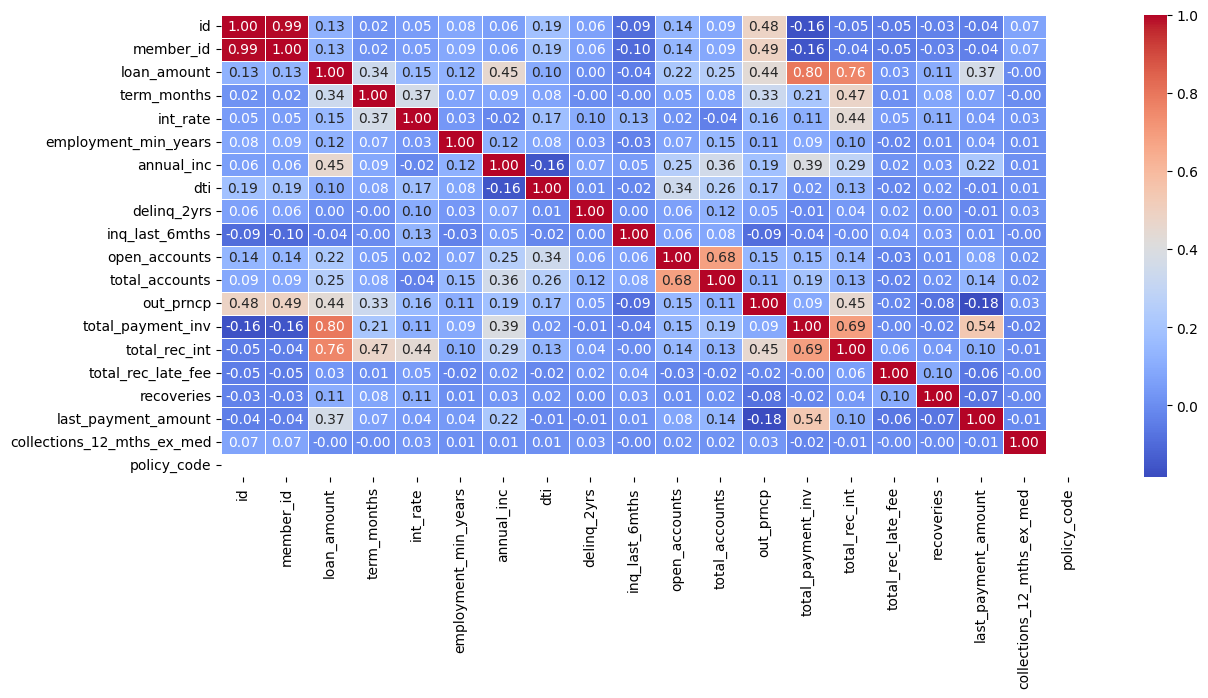

In [21]:
loans_clean_plots.correlation(14, 6)